In [ ]:
import matplotlib.pyplot as plt

In [1]:
import matplotlib.pyplot as plt
import re

In [2]:
def get_data(file_name):
    x = []
    hit_rate = []
    total_IO = []
    with open(file_name, mode="r", encoding="utf-8") as reader:
        i = 1
        for line in reader.readlines():
            x.append(i)
            vec = line.split(',')
            total_IO.append(int(float(vec[0])))
            hit_rate.append(float(float(vec[-1]) / i))
            i += 1
    #最后一行是总耗时,过滤
    x = x[:-1]
    hit_rate = hit_rate[:-1]
    total_IO = total_IO[:-1]
    return (x, hit_rate, total_IO)

In [3]:
file_names = ['LRU_1024.out', 'LRU_2048.out', 'LRU_4096.out', 
            'TwoQueues_1024.out', 'TwoQueues_2048.out', 'TwoQueues_4096.out']

In [4]:
data = {}

In [5]:
for file_name in file_names:
        tmp = re.sub(r'\..*$', "", file_name).replace('_',' with buffer size of ')
        data[tmp] = get_data(file_name)

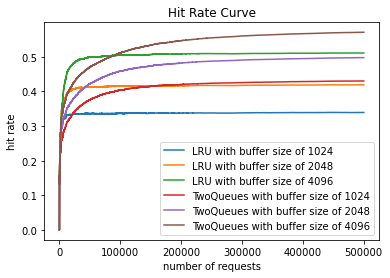

In [7]:
plt.title("Hit Rate Curve")
plt.xlabel('number of requests')
plt.ylabel('hit rate')
for key, val in data.items():
    plt.plot(val[0], val[1], label = key)
plt.legend(loc= 'best')
plt.savefig('src\hit_rate.png', dpi=500, bbox_inches = 'tight')
plt.show()

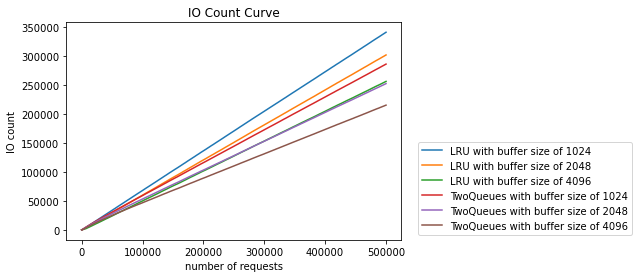

In [17]:
plt.title("IO Count Curve")
plt.xlabel('number of requests')
plt.ylabel('IO count')
for key, val in data.items():
    plt.plot(val[0], val[2], label = key)
plt.legend(loc=2, bbox_to_anchor=(1.05,0.45),borderaxespad = 0.)  
plt.savefig('src\IO_count.png', dpi=500, bbox_inches = 'tight')
plt.show()